# CDA 가설 검정

## 데이터 불러오기

In [73]:
import pandas as pd

data = pd.read_csv("data/cda_sample_data.csv")
data.head()

,키(cm),체온(°C),운동시간(분),게임시간(분),유튜브시청시간(분),성별,흡연여부,집단,시험점수,집단_C
0,173.48,36.58,5.0,12.0,1.0,여,흡연,B,74.0,B
1,169.03,36.60,3.0,26.0,4.0,여,비흡연,A,75.0,A
2,174.53,36.30,21.0,18.0,1.0,남,비흡연,B,46.0,B
3,180.66,36.57,25.0,24.0,4.0,여,비흡연,B,80.0,B
4,168.36,36.59,70.0,4.0,2.0,여,비흡연,A,68.0,A


## 1. 정규성 검정

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

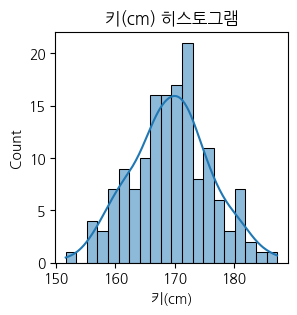

In [75]:
plt.figure(figsize=(3,3))
# data["키(cm)"].plot(kind="hist")
sns.histplot(data=data, x="키(cm)", bins=20, kde=True)
plt.title("키(cm) 히스토그램")
plt.show()

In [76]:
def draw_hist(df, key) :
    plt.figure(figsize=(3,3))
    sns.histplot(data=df, x=key, bins=20, kde=True)
    plt.title(f"{key} 히스토그램")
    plt.show()

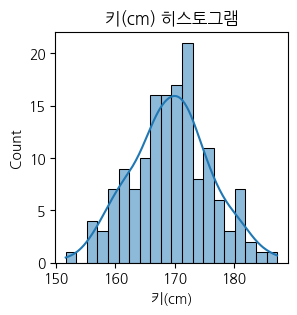

In [77]:
draw_hist(data, "키(cm)")

In [78]:
def draw_sub_hist(variables) :
    fig, ax = plt.subplots(1, len(variables), figsize=(15, 5))
    for i, var in enumerate(variables):
        ax[i].hist(data[var], edgecolor="black")
        ax[i].set_title(var)

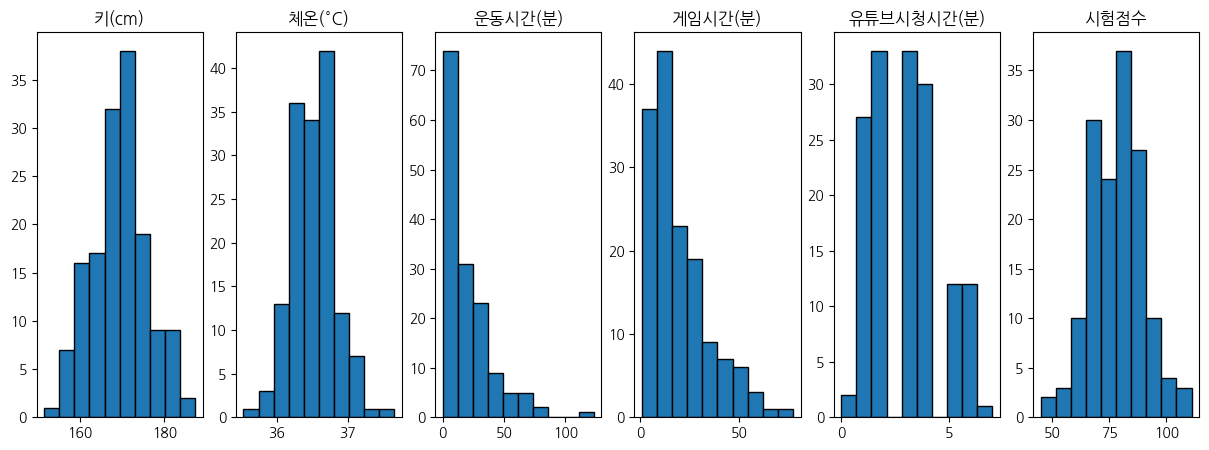

In [79]:
variables = ["키(cm)", "체온(°C)", "운동시간(분)", "게임시간(분)", "유튜브시청시간(분)", "시험점수"]
draw_sub_hist(variables)

`uv add scipy`

In [80]:
from scipy.stats import shapiro

def normality_test(df, key) :
    result = shapiro(df[key])
    draw_hist(df, key)
    print(result)

    print(f"{key} 정규성 검정결과 p-value: {result[1]:.4f}")
    print("귀무가설을 기각합니다 : 정규분포를 따르지 않습니다" if result[1] < 0.05 else "귀무가설을 따릅니다 : 정규분포를 따릅니다")
    
    return result[1] >= 0.05

def normality_test_all(df, variables) :
    for i, var in enumerate(variables):
        result = shapiro(df[var])
        draw_hist(df, var)
        print(result)

        print(f"{var} 정규성 검정결과 p-value: {result[1]:.4f}")
        print("귀무가설을 기각합니다 : 정규분포를 따르지 않습니다" if result[1] < 0.05 else "귀무가설을 따릅니다 : 정규분포를 따릅니다")
        print('-'* 50)

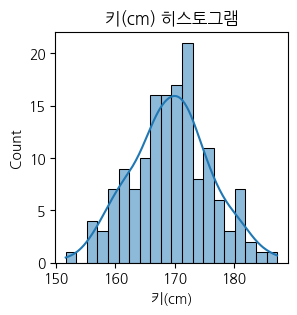

ShapiroResult(statistic=np.float64(0.9958013601422515), pvalue=np.float64(0.9478115310795381))
키(cm) 정규성 검정결과 p-value: 0.9478
귀무가설을 따릅니다 : 정규분포를 따릅니다
--------------------------------------------------


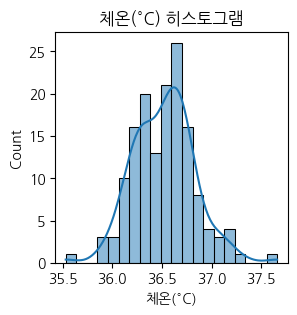

ShapiroResult(statistic=np.float64(0.9852952070629711), pvalue=np.float64(0.1116953655236208))
체온(°C) 정규성 검정결과 p-value: 0.1117
귀무가설을 따릅니다 : 정규분포를 따릅니다
--------------------------------------------------


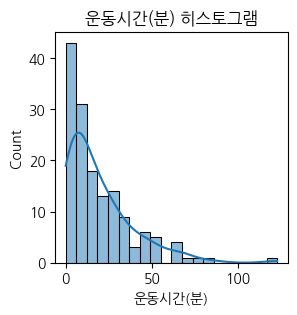

ShapiroResult(statistic=np.float64(0.8214531107009067), pvalue=np.float64(3.042027497957974e-12))
운동시간(분) 정규성 검정결과 p-value: 0.0000
귀무가설을 기각합니다 : 정규분포를 따르지 않습니다
--------------------------------------------------


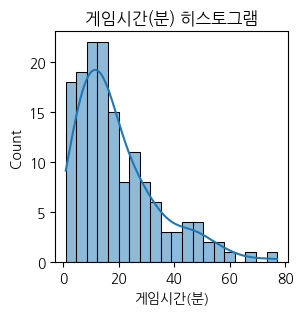

ShapiroResult(statistic=np.float64(0.881865096741161), pvalue=np.float64(1.4136883662166838e-09))
게임시간(분) 정규성 검정결과 p-value: 0.0000
귀무가설을 기각합니다 : 정규분포를 따르지 않습니다
--------------------------------------------------


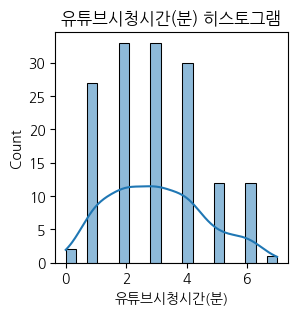

ShapiroResult(statistic=np.float64(0.9366994624710727), pvalue=np.float64(2.9937861103593303e-06))
유튜브시청시간(분) 정규성 검정결과 p-value: 0.0000
귀무가설을 기각합니다 : 정규분포를 따르지 않습니다
--------------------------------------------------


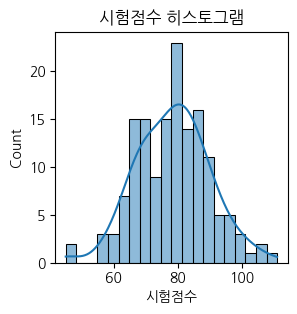

ShapiroResult(statistic=np.float64(0.9948505702914499), pvalue=np.float64(0.8772260778466701))
시험점수 정규성 검정결과 p-value: 0.8772
귀무가설을 따릅니다 : 정규분포를 따릅니다
--------------------------------------------------


In [81]:
normality_test_all(data, variables)

# 유의 수준 5% 하에서 == pvalue < 0.05

# 귀무가설(HO): 정규분포를 따른다
# 대립가설(H1): 정규분포를 따르지 않는다

# 조건: 만약 pvalue < 0.05 이면 귀무가설을 기각한다
# 결론: 유의 수준 5%하에서 이 변수는 귀무가설을 기각하여 정규분포를 따르지 않는다

# 위에 그린 그림과 함께 변수가 정규분포를 따르는지 결론을 작성

## 2. 평균 검정

### 1) 독립 표본 평균 검정

In [82]:
data.head()

,키(cm),체온(°C),운동시간(분),게임시간(분),유튜브시청시간(분),성별,흡연여부,집단,시험점수,집단_C
0,173.48,36.58,5.0,12.0,1.0,여,흡연,B,74.0,B
1,169.03,36.60,3.0,26.0,4.0,여,비흡연,A,75.0,A
2,174.53,36.30,21.0,18.0,1.0,남,비흡연,B,46.0,B
3,180.66,36.57,25.0,24.0,4.0,여,비흡연,B,80.0,B
4,168.36,36.59,70.0,4.0,2.0,여,비흡연,A,68.0,A


In [83]:
## 독립 표본이란? 두 집단이 독립이다. ex. 언리얼반/AI반 , 광고A/광고B

## [가정]
## 두 집단은 각각 정규분포를 따르는 연속형 데이터
## 두 집단의 분산이 같은지 다른지 판단해야함 > 이 결과에 따라 통계 계산 방법이 달라짐

## [가설 설정]
## 귀무가설(H0) : 두 집단의 평균은 같다
## 대립가설(H1) : 두 집단의 평균은 같지 않다(크다/작다)

from scipy.stats import levene, ttest_ind

group_A = data.loc[data["집단"] == "A", "시험점수"]
group_B = data.loc[data["집단"] == "B", "시험점수"]
print(f"Group A의 평균: {group_A.mean()}")
print(f"Group B의 평균: {group_B.mean()}")

# Step1. 등분산 검정
## 귀무가설(H0) : 두 집단은 등분산이다
## 대립가설(H1) : 두 집단은 등분산이 아니다
result = levene(group_A, group_B)
print(result)
equal_val = result[1] >= 0.05
print("등분산이다" if equal_val else "등분산이 아니다")

# Step2. 독립 표본 T-test
result = ttest_ind(group_A, group_B, equal_var=equal_val)
print(result)
print("귀무가설을 채택" if result[1] >= 0.05 else "귀무가설을 기각")

Group A의 평균: 76.23376623376623
Group B의 평균: 80.78082191780823
LeveneResult(statistic=np.float64(2.381455012043491), pvalue=np.float64(0.12491865382161503))
등분산이다
TtestResult(statistic=np.float64(-2.480918742143134), pvalue=np.float64(0.014223859141825253), df=np.float64(148.0))
귀무가설을 기각


In [84]:
def equal_variances_test(group_A, group_B, limit):
    result = levene(group_A, group_B)
    return result[1] >= limit 

### 2) 대응표본 평균 검정

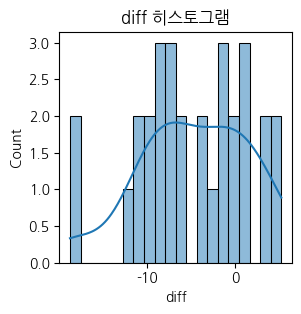

ShapiroResult(statistic=np.float64(0.9640543377663393), pvalue=np.float64(0.3914622504470085))
diff 정규성 검정결과 p-value: 0.3915
귀무가설을 따릅니다 : 정규분포를 따릅니다
--------------------------------------------------
TtestResult(statistic=np.float64(4.156919517876426), pvalue=np.float64(0.0002608579811022753), df=np.int64(29))
대응표본 평균 검전 pvalue: 0.0003
귀무가설을 기각


In [91]:
## 대응표본: 하나의 집단의 전/후 데이터

## [가정]
## 두 집단은 각각 정규분포를 따르는 연속형 데이터
## 동일 데이터이므로 분산 검정이 필요 없음

## [가설 설정]
## 귀무가설(H0) : 집단의 전 후는 차이가 없다 (전 - 후 = 0)
## 대립가설(H1) : 집단의 전 후는 차이가 있다 (전 - 후 != 0)

from scipy.stats import shapiro, ttest_rel
import numpy as np
np.random.seed(42)

paired_data = pd.DataFrame({
    "운동 전": np.random.normal(60, 5, 30),
    "운동 후": np.random.normal(55, 5, 30)
})
paired_data["diff"] = paired_data["운동 후"] - paired_data["운동 전"]

# Step1 : 정규성 검정
## 귀무가설(H0) : 집단의 전 후는 차이는 정규분포를 따른다
## 대립가설(H1) : 집단의 전 후는 차이는 정규분포를 따르지 않는다
normality_val = normality_test(paired_data, "diff")

if normality_val:
    # Step2 : 대응표본 t-test
    result = ttest_rel(paired_data["운동 전"], paired_data["운동 후"])
    print("-"*50)
    print(result)
    print(f"대응표본 평균 검전 pvalue: {result[1]:.4f}")
    print("귀무가설을 채택" if result[1] >= 0.05 else "귀무가설을 기각")

### 3) ANOVA 분석

In [86]:
## [가정]
## 각 집단은 각각 정규분포를 따르는 연속형 데이터이다
## 각 집단의 분산이 같은지 다른지 판단해야 한다

## [가설 설정]
## 귀무가설(H0) : 각 집단의 평균은 모두 같다
## 대립가설(H1) : 각 집단의 평균은 모두 같지 않다
from scipy.stats import levene, f_oneway

group_A = data.loc[data["집단_C"] == "A", "시험점수"]
group_B = data.loc[data["집단_C"] == "B", "시험점수"]
group_C = data.loc[data["집단_C"] == "C", "시험점수"]
print(f"Group A의 평균: {group_A.mean()}")
print(f"Group B의 평균: {group_B.mean()}")
print(f"Group C의 평균: {group_C.mean()}")

# Step1. 등분산 검정
result = levene(group_A, group_B, group_C)
equal_val = result[1] >= 0.05
print(result)

# Step2. ANOVA (등분산 검정 결과 등분산이어야 사용 가능)
if (result[1] >= 0.05) :
    result = f_oneway(group_A, group_B, group_C)
    print(result)
    print(f"ANOVA 결과 pvalue = {result[1]:.4f}")
    print("귀무가설을 채택" if result[1] >= 0.05 else "귀무가설을 기각")

Group A의 평균: 72.66666666666667
Group B의 평균: 73.41304347826087
Group C의 평균: 91.5909090909091
LeveneResult(statistic=np.float64(2.037219421019124), pvalue=np.float64(0.13405603086657428))
F_onewayResult(statistic=np.float64(91.70940064687885), pvalue=np.float64(1.4014089351972043e-26))
ANOVA 결과 pvalue = 0.0000
귀무가설을 기각


## 3. 독립성 검정

In [94]:
# 독립성 검정
# 두 개의 범주형 변수가 서로 독립인지 아닌지를 검정함
# 귀무가설(H0): 두 변수는 서로 독립이다
# 대립가설(H1): 두 변수는 서로 독립 아니다

from scipy.stats import chi2_contingency

cross_data = pd.crosstab(data["성별"], data["흡연여부"])
cross_data

흡연여부,비흡연,흡연
성별,,
남,40,31
여,44,35


In [95]:
results = chi2_contingency(cross_data)
print(results)
print(f"범주형 변수 독립성 검정 pvalue: {results[1]}")
expected_data = pd.DataFrame(results[-1], index=cross_data.index, columns=cross_data.columns)
expected_data

Chi2ContingencyResult(statistic=np.float64(0.0), pvalue=np.float64(1.0), dof=1, expected_freq=array([[39.76, 31.24],
       [44.24, 34.76]]))
범주형 변수 독립성 검정 pvalue: 1.0


흡연여부,비흡연,흡연
성별,,
남,39.76,31.24
여,44.24,34.76


## 정리

In [ ]:
# 검정
# 귀무가설 (H0)
# 대립가설 (H1)
# statistics, p-value
# p-value < 0.05(=유의수준)
# --> 유의수준 5%하에서 귀무가설을 기각합니다.

# 1. 정규성 검정
# 정규분포를 따른다는 가정이 필요하기 때문에
# 정규성 검정을 사전에 진행
# H0 : 정규분포를 따른다
# H1 : 정규분포를 따르지 않는다
# shapiro (소규모 데이터에 유리)

# 2. 평균 검정
# 1) 독립 표본 평균 검정
# step1. 등분산 검정
# 귀무가설(H0) : 두 집단은 등분산이다
# 대립가설(H1) : 두 집단은 등분산이 아니다
# levene(A, B) > equal_var > 결과에 따라 독립 표본 통계 계산 방법이 달라짐

# step2.  독립 표본 T-test
# 귀무가설(H0) : 두 집단의 평균은 같다
# 대립가설(H1) : 두 집단의 평균은 같지 않다(크다/작다)
# ttest_ind(A, B, equal_var=?)

# 2) 대응 표본 T-test
# 귀무가설(H0) : 집단의 전 후는 차이가 없다 (전 - 후 = 0)
# 대립가설(H1) : 집단의 전 후는 차이가 있다 (전 - 후 != 0)
# ttest_rel(diff)

# 3) ANOVA
# step1. 등분산 검정
# levene(A, B)

# Step2. ANOVA 분석
# H0: 집단 A, B, C의 평균이 같다.
# H1: 집단 A, B, C의 평균이 같지 않다.
# f_oneway(A, B, C)

# 3. 독립성 검정
# 범주형 데이터 두 집단이 독립인가 아닌가 판단
# H0: 두 집단이 서로 독립이다.
# H1: 두 집단이 서로 독립이 아니다. 
# 교차표(cross_data) = pd.crosstab()
# ch2_contingency(cross_data)
# expected_data